In [11]:
import pandas as pd

from prophet import Prophet

url = 'https://raw.githubusercontent.com/facebook/prophet/main/examples/example_wp_log_peyton_manning.csv'

df = pd.read_csv(url)

df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2905 entries, 0 to 2904
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ds      2905 non-null   object 
 1   y       2905 non-null   float64
dtypes: float64(1), object(1)
memory usage: 45.5+ KB


In [12]:
model = Prophet()
model.fit(df)

12:51:41 - cmdstanpy - INFO - Chain [1] start processing
12:51:42 - cmdstanpy - INFO - Chain [1] done processing


In [13]:
future_df = model.make_future_dataframe(periods=365)

future_df.tail()

,ds
3265,2017-01-15
3266,2017-01-16
3267,2017-01-17
3268,2017-01-18
3269,2017-01-19


In [14]:
forecast_df = model.predict(future_df)
forecast_df[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
3265,2017-01-15,8.206964,7.464856,8.938411
3266,2017-01-16,8.531958,7.797652,9.299027
3267,2017-01-17,8.319376,7.583978,9.037144
3268,2017-01-18,8.151991,7.409924,8.891095
3269,2017-01-19,8.163908,7.473614,8.930606


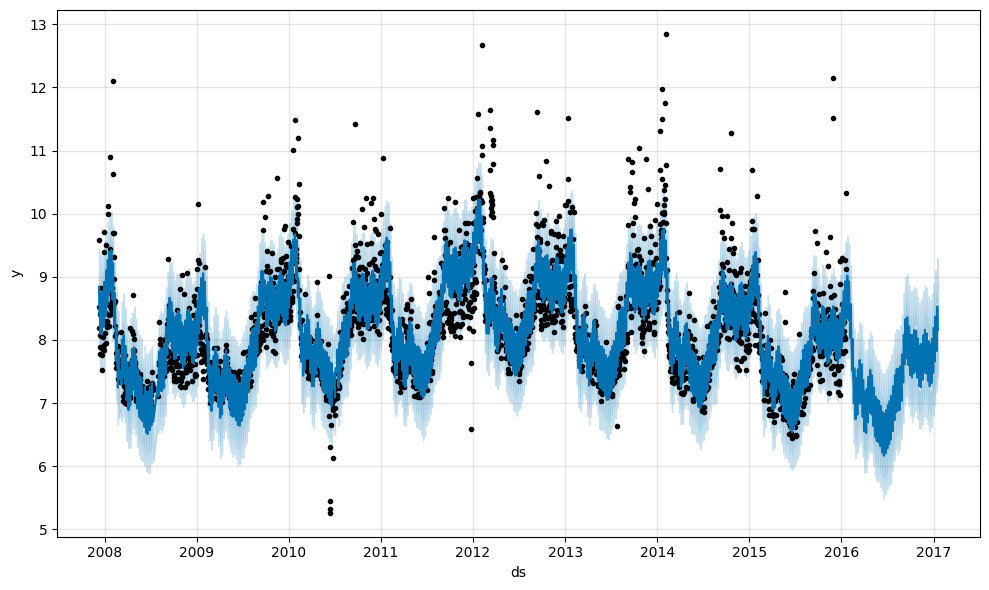

In [15]:
fig = model.plot(forecast_df)

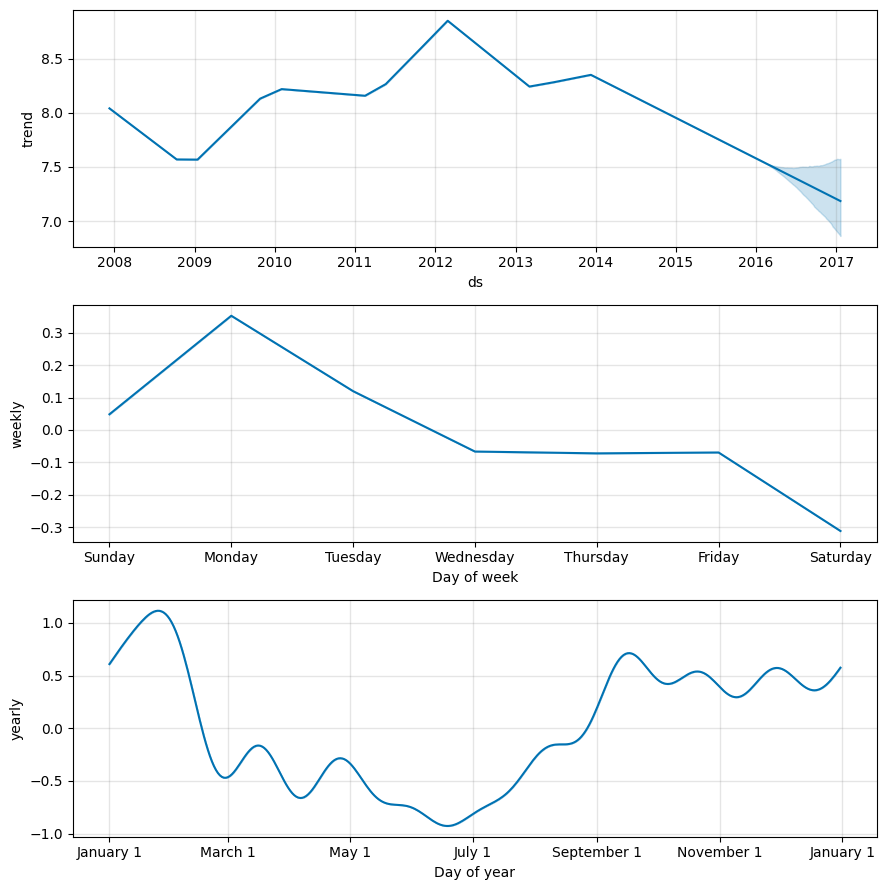

In [16]:
fig = model.plot_components(forecast_df)

In [17]:
df['SomeDate'] = pd.to_datetime(df['SomeDate'])

df['DayOfWeek'] = df['SomeDate'].dt.dayofweek

KeyError: 'SomeDate'